In [14]:
# Initial code provided by Veena Suresh for the LSTM model
# This code for the BiLSTM model with additional outcome metrics

from datetime import datetime 
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Define the path to the dataset
dataset_path = './Room2_npy'

# Define the target length for data trimming/padding
target_length = 750

# Define parameters for model
Model_type = "Bidirectional Long Short-Term Memory"
batchsize = 32
monitor_choice = 'val_loss'
dropout = 0.3
learningrate = 0.001

#Initialise lists
data_list = []
data_list1 = []
labels_list = []

classes_to_double = ["kneel", "liedown", "pickup"]

# Helper function to split sequences

def split_sequence(sequence, step):
    return [sequence[i:i + step] for i in range(0, len(sequence), step) if len(sequence[i:i + step]) == step]

# Traverse through each activity directory
for activity_folder in os.listdir(dataset_path):
    activity_path = os.path.join(dataset_path, activity_folder)
##    print(f"Processing activity: {activity_folder}")

    if os.path.isdir(activity_path):
        for participant_file in os.listdir(activity_path):
            participant_path = os.path.join(activity_path, participant_file)
            if os.path.isfile(participant_path) and participant_file.endswith('.npy'):
##                print(f"Loading data from file: {participant_file}")
                data = np.load(participant_path)
                data = np.real(data)

                # Split data into smaller sequences
                data_splits = split_sequence(data, target_length)

                for split_data in data_splits:
                    # Normalize data
                    min_val = np.min(split_data)
                    max_val = np.max(split_data)
                    data_normalized = (split_data - min_val) / (max_val - min_val) if max_val != min_val else np.zeros(split_data.shape)

                    label = activity_folder
#                    data_list1.append(data_normalized[:, 0:30])          
#                    labels_list.append(label)
#                    data_list1.append(data_normalized[:, 30:60])          
#                    labels_list.append(label)
                    data_list.append(data_normalized)          
                    labels_list.append(label)
                    if label in classes_to_double:
                        data_list.append(data_normalized.copy())  # Double the data
                        labels_list.append(label)  # Double the label

# Convert lists to arrays for machine learning processing
data = np.array(data_list)
labels = np.array(labels_list).reshape(-1, 1)

print("Final data shape:", data.shape)
print("Final labels shape:", labels.shape)

Final data shape: (1814, 750, 90)
Final labels shape: (1814, 1)


k-fold No: 1
1305
750
90


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_5 (Bidirectional) │ (32, 750, 128)         │       224,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (32, 750, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (32, 64)               │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (32, 8)                │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,208 (1.57 MB)

 Trainable params: 410,568 (1.57 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 916ms/step - accuracy: 0.1043 - loss: 2.5255 - val_accuracy: 0.1040 - val_loss: 2.1826
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 908ms/step - accuracy: 0.1543 - loss: 2.2594 - val_accuracy: 0.1254 - val_loss: 2.2082
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1757 - loss: 2.1636 - val_accuracy: 0.1651 - val_loss: 2.1208
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 944ms/step - accuracy: 0.2007 - loss: 2.0336 - val_accuracy: 0.2813 - val_loss: 1.9962
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 953ms/step - accuracy: 0.2518 - loss: 1.9685 - val_accuracy: 0.2141 - val_loss: 2.0424
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 925ms/step - accuracy: 0.3158 - loss: 1.8429 - val_accuracy: 0.2813 - val_loss: 1.9597
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 926ms/step - accuracy: 0.3239 - loss: 1.7637 - val_accuracy: 0.3517 - val_loss: 1.7909
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 930ms/step - accuracy: 0.3481 - loss: 1.6646 - val

<Figure size 1200x800 with 0 Axes>

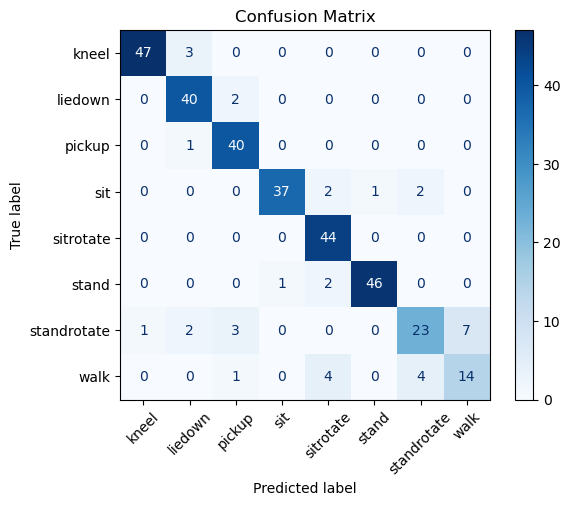


===========================End of fold 1===========================
k-fold No: 2
1305
750
90


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional) │ (32, 750, 128)         │       224,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (32, 750, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (32, 64)               │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (32, 8)                │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,208 (1.57 MB)

 Trainable params: 410,568 (1.57 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 933ms/step - accuracy: 0.1245 - loss: 2.4280 - val_accuracy: 0.1284 - val_loss: 2.1828
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 904ms/step - accuracy: 0.1261 - loss: 2.2895 - val_accuracy: 0.1743 - val_loss: 2.1263
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 911ms/step - accuracy: 0.1452 - loss: 2.2464 - val_accuracy: 0.1743 - val_loss: 2.1191
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 899ms/step - accuracy: 0.1372 - loss: 2.2014 - val_accuracy: 0.1804 - val_loss: 2.1298
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 891ms/step - accuracy: 0.1422 - loss: 2.2065 - val_accuracy: 0.1835 - val_loss: 2.0746
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 890ms/step - accuracy: 0.2334 - loss: 2.0291 - val_accuracy: 0.3456 - val_loss: 1.8387
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 895ms/step - accuracy: 0.3337 - loss: 1.7856 - val_accuracy: 0.1284 - val_loss: 2.9028
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 892ms/step - accuracy: 0.3872 - loss: 1.5874 - 

<Figure size 1200x800 with 0 Axes>

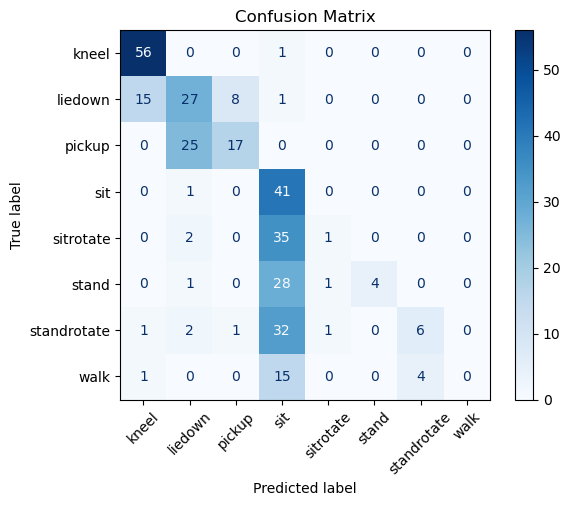


===========================End of fold 2===========================
k-fold No: 3
1306
750
90


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_7 (Bidirectional) │ (32, 750, 128)         │       224,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (32, 750, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (32, 64)               │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (32, 8)                │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,208 (1.57 MB)

 Trainable params: 410,568 (1.57 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 912ms/step - accuracy: 0.1383 - loss: 2.4233 - val_accuracy: 0.1258 - val_loss: 2.1599
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 910ms/step - accuracy: 0.1257 - loss: 2.2902 - val_accuracy: 0.1595 - val_loss: 2.1671
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 901ms/step - accuracy: 0.1480 - loss: 2.2540 - val_accuracy: 0.1411 - val_loss: 2.1557
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 902ms/step - accuracy: 0.1826 - loss: 2.1835 - val_accuracy: 0.1840 - val_loss: 2.0539
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 899ms/step - accuracy: 0.2802 - loss: 1.9107 - val_accuracy: 0.1994 - val_loss: 2.0487
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 923ms/step - accuracy: 0.3366 - loss: 1.7248 - val_accuracy: 0.3006 - val_loss: 2.0777
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 894ms/step - accuracy: 0.4183 - loss: 1.5931 - val_accuracy: 0.3804 - val_loss: 1.6433
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 891ms/step - accuracy: 0.4360 - loss: 1.4766 - 

<Figure size 1200x800 with 0 Axes>

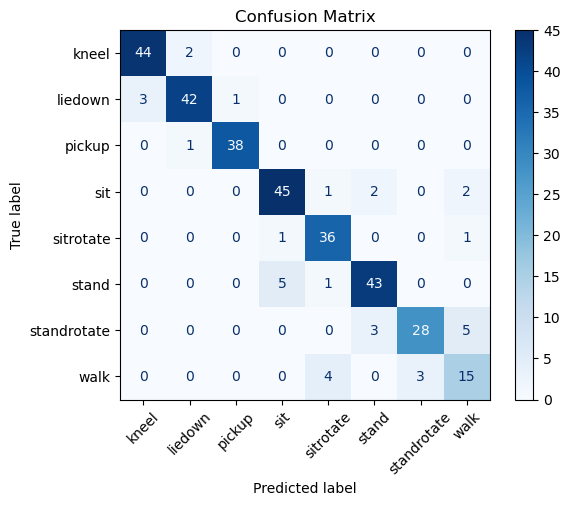


===========================End of fold 3===========================
k-fold No: 4
1306
750
90


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_8 (Bidirectional) │ (32, 750, 128)         │       224,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (32, 750, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (32, 64)               │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (32, 8)                │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,208 (1.57 MB)

 Trainable params: 410,568 (1.57 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 939ms/step - accuracy: 0.1372 - loss: 2.4461 - val_accuracy: 0.1166 - val_loss: 2.1404
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 902ms/step - accuracy: 0.1579 - loss: 2.2662 - val_accuracy: 0.1503 - val_loss: 2.1441
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 908ms/step - accuracy: 0.1358 - loss: 2.2081 - val_accuracy: 0.1258 - val_loss: 2.1677
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 902ms/step - accuracy: 0.1925 - loss: 2.0674 - val_accuracy: 0.1319 - val_loss: 2.2716
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 900ms/step - accuracy: 0.2410 - loss: 1.9338 - val_accuracy: 0.1810 - val_loss: 2.1551
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 904ms/step - accuracy: 0.3108 - loss: 1.8530 - val_accuracy: 0.1810 - val_loss: 2.0574
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 910ms/step - accuracy: 0.3911 - loss: 1.6701 - val_accuracy: 0.1258 - val_loss: 2.7888
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 916ms/step - accuracy: 0.4301 - loss: 1.4756 - 

<Figure size 1200x800 with 0 Axes>

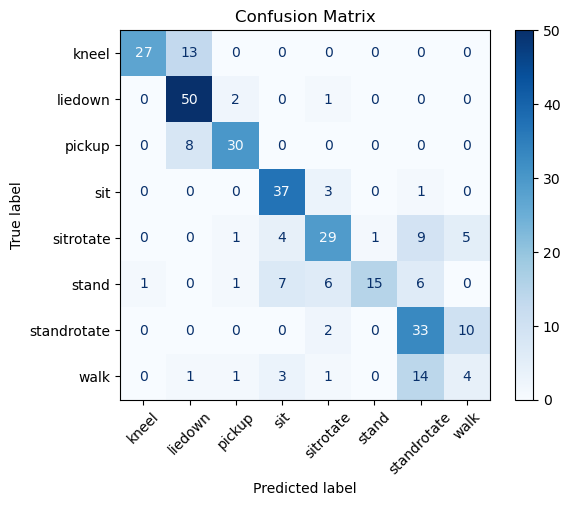


===========================End of fold 4===========================
k-fold No: 5
1306
750
90


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_9 (Bidirectional) │ (32, 750, 128)         │       224,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (32, 750, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (32, 64)               │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (32, 8)                │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,208 (1.57 MB)

 Trainable params: 410,568 (1.57 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 910ms/step - accuracy: 0.1116 - loss: 2.4546 - val_accuracy: 0.1319 - val_loss: 2.1474
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 905ms/step - accuracy: 0.1314 - loss: 2.2722 - val_accuracy: 0.1595 - val_loss: 2.1405
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 908ms/step - accuracy: 0.1141 - loss: 2.2557 - val_accuracy: 0.1319 - val_loss: 2.1420
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 905ms/step - accuracy: 0.1745 - loss: 2.1489 - val_accuracy: 0.1534 - val_loss: 2.1162
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 905ms/step - accuracy: 0.2540 - loss: 2.0009 - val_accuracy: 0.2117 - val_loss: 2.2311
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 905ms/step - accuracy: 0.3198 - loss: 1.8021 - val_accuracy: 0.2699 - val_loss: 2.1692
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 900ms/step - accuracy: 0.3712 - loss: 1.6555 - val_accuracy: 0.2975 - val_loss: 2.1874
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 909ms/step - accuracy: 0.3827 - loss: 1.5846 - 

<Figure size 1200x800 with 0 Axes>

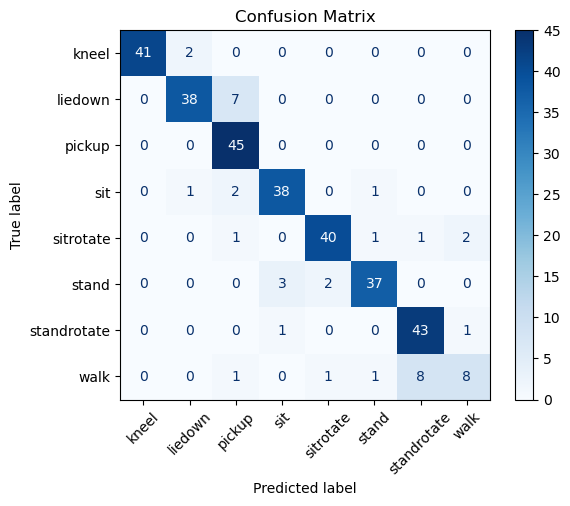


===========================End of fold 5===========================

 Cross-validation results: 
Mean loss: 0.6595 (+/- 0.3766)
Mean accuracy: 0.7654 (+/- 0.1692)


In [15]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Encode the labels before splitting the data
encoder = OneHotEncoder(sparse_output=False)
labels_encoded = encoder.fit_transform(labels)

X_train_val, x_test_holdout, y_train_val, y_test_holdout = train_test_split(data, labels_encoded, test_size=0.1, random_state = 42)

#===========K-fold (New code)===========
from sklearn.model_selection import KFold
val_index = {}
train_index = {}
#K
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)
accuracies = []
losses = []
fold_no = 1
for train_i, val_i in kf.split(X_train_val):
    val_index[f"fold_no_{fold_no}"] = val_i
    train_index[f"fold_no_{fold_no}"] = train_i
    X_train, X_test = X_train_val[train_i], X_train_val[val_i]
    y_train_encoded, y_test_encoded = y_train_val[train_i], y_train_val[val_i]
    print(f"k-fold No: {fold_no}")
#=======================================

    # Ensure Graphviz bin directory is in the PATH
    os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin'

    # Define the BiLSTM model
    model = Sequential()
    model.add(Input(batch_size= batchsize,shape=(X_train.shape[1], X_train.shape[2])))
    print(X_train.shape[0])
    print(X_train.shape[1])
    print(X_train.shape[2])
    model.add(Bidirectional(LSTM(128, return_sequences=True), merge_mode= 'sum'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

    # Compile the model with a different optimizer
    optimizer = Adam(learning_rate=learningrate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Print the model summary
    model.summary()

    # Implement early stopping
    monitor_choice = 'val_loss'
    patience_number = 20
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    epochsvalue = 100

    # start the timer for model training
    start_time = datetime.now()
    # Train the model
    history = model.fit(X_train, y_train_encoded, epochs=epochsvalue, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])

    #Evaluate model
    loss, accuracy = model.evaluate(X_test, y_test_encoded)

    end_time = datetime.now() 
    time_difference = (end_time - start_time).total_seconds()/60
    #===========print the result for each fold(New code)===========
    print(f"\n Fold-number: {fold_no} - loss: {loss:.4f}, Accuracy: {accuracy:.4f} ")
    #save the model
    model.save(f"bilstm_fold_{fold_no}.keras")
    #===================================
    #store values to calculate average loss
    losses.append(loss)
    accuracies.append(accuracy)

    # Make predictions
    y_pred_encoded = model.predict(X_test)
    y_pred = np.argmax(y_pred_encoded, axis=1)
    y_true = np.argmax(y_test_encoded, axis=1)

    # Generate confusion matrix and model outcome metrics
    cm = confusion_matrix(y_true, y_pred)
    print()
    print(f"=================Model outcomes from fold-{fold_no}=================")
    print()
    print("Model type: ", Model_type)
    print()
    print(f"Execution time of fold-no {fold_no} is: {time_difference:.1f} minutes") 
    print()
    print(f"Test loss:       {loss:.4f}")
    print(f"Test accuracy:   {accuracy:.4f}")
    print("Target Length:  ", target_length)
    print("Batch Size:     ", batchsize)
    print("Early Stopping: ", monitor_choice)
    print("Patience:       ", patience_number)
    print("Dropout:        ", dropout)
    print("Learning Rate:  ", learningrate)
    print()
    HAR_label = ['Kneel', 'Lie Down', 'Pick Up', 'Sit', 'Sit Rotate', 'Stand', 'Stand Rotate', 'Walk']

    # Print classification report
    print(classification_report(y_true, y_pred, zero_division=0, target_names=HAR_label))

    #print(confusion_matrix[0, 0])
    cmd = ConfusionMatrixDisplay(cm, display_labels=encoder.categories_[0])
    plt.figure(figsize=(12, 8))
    cmd.plot(cmap=plt.cm.Blues)
    plt.xticks(rotation=45)
    plt.title('Confusion Matrix')
    plt.show()

    #===================================
    print(f"\n===========================End of fold {fold_no}===========================")
    fold_no += 1
    

#calculate the average result
print("\n Cross-validation results: ")
print(f"Mean loss: {np.mean(losses):.4f} (+/- {np.std(losses):.4f})")
print(f"Mean accuracy: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")
#===================================


In [16]:
print(accuracies)
print(losses)

[0.8899082541465759, 0.46483179926872253, 0.8926380276679993, 0.6901840567588806, 0.8895705342292786]
[0.4264690577983856, 1.3574682474136353, 0.33104509115219116, 0.7501788139343262, 0.4324096441268921]


### Evaluate models performance using a hold-out dataset

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step

=================Model outcomes from fold-1=================

Model type:  Bidirectional Long Short-Term Memory


              precision    recall  f1-score   support

       Kneel       1.00      0.92      0.96        24
    Lie Down       0.88      1.00      0.94        23
     Pick Up       0.97      1.00      0.98        29
         Sit       0.96      0.79      0.87        34
  Sit Rotate       0.83      1.00      0.91        24
       Stand       0.82      0.93      0.88        15
Stand Rotate       0.88      0.70      0.78        20
        Walk       0.64      0.69      0.67        13

    accuracy                           0.89       182
   macro avg       0.87      0.88      0.87       182
weighted avg       0.90      0.89      0.89       182



<Figure size 1200x800 with 0 Axes>

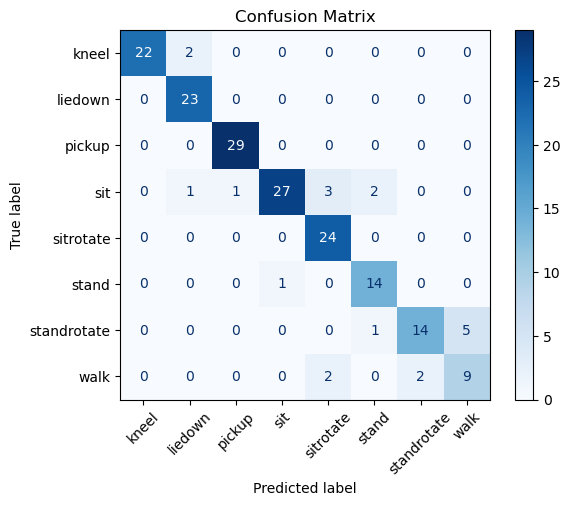

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step

=================Model outcomes from fold-2=================

Model type:  Bidirectional Long Short-Term Memory


              precision    recall  f1-score   support

       Kneel       0.69      0.92      0.79        24
    Lie Down       0.30      0.48      0.37        23
     Pick Up       0.62      0.34      0.44        29
         Sit       0.40      0.94      0.56        34
  Sit Rotate       0.50      0.12      0.20        24
       Stand       0.00      0.00      0.00        15
Stand Rotate       0.70      0.35      0.47        20
        Walk       0.00      0.00      0.00        13

    accuracy                           0.47       182
   macro avg       0.40      0.39      0.35       182
weighted avg       0.45      0.47      0.40       182



<Figure size 1200x800 with 0 Axes>

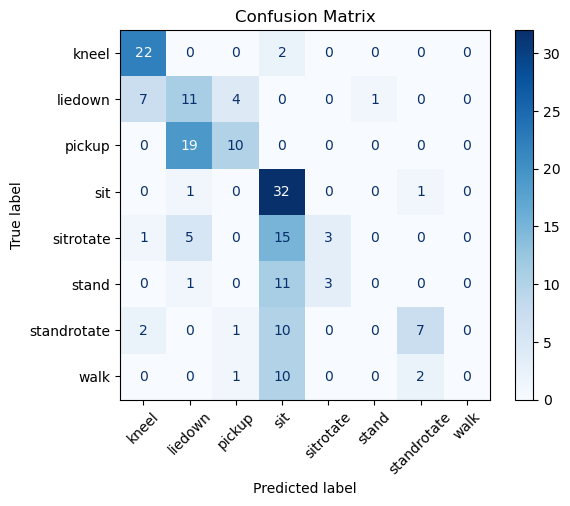

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step

=================Model outcomes from fold-3=================

Model type:  Bidirectional Long Short-Term Memory


              precision    recall  f1-score   support

       Kneel       0.86      1.00      0.92        24
    Lie Down       0.95      0.87      0.91        23
     Pick Up       1.00      0.97      0.98        29
         Sit       0.88      0.82      0.85        34
  Sit Rotate       0.79      0.96      0.87        24
       Stand       0.71      0.80      0.75        15
Stand Rotate       0.82      0.70      0.76        20
        Walk       0.60      0.46      0.52        13

    accuracy                           0.85       182
   macro avg       0.83      0.82      0.82       182
weighted avg       0.85      0.85      0.85       182



<Figure size 1200x800 with 0 Axes>

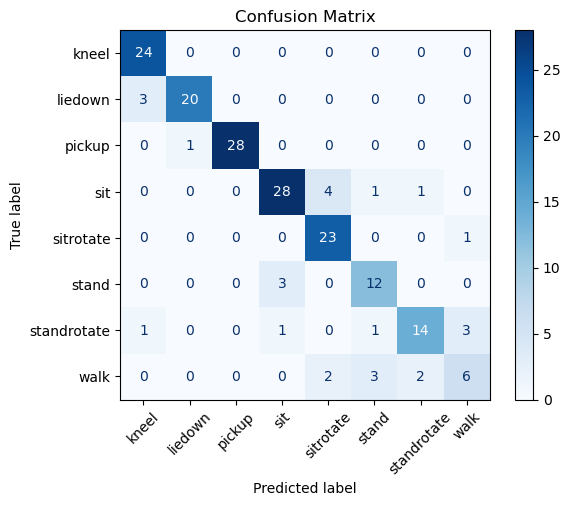

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step

=================Model outcomes from fold-4=================

Model type:  Bidirectional Long Short-Term Memory


              precision    recall  f1-score   support

       Kneel       1.00      0.75      0.86        24
    Lie Down       0.64      0.91      0.75        23
     Pick Up       0.92      0.83      0.87        29
         Sit       0.83      0.88      0.86        34
  Sit Rotate       0.75      0.75      0.75        24
       Stand       1.00      0.47      0.64        15
Stand Rotate       0.53      0.95      0.68        20
        Walk       0.50      0.08      0.13        13

    accuracy                           0.76       182
   macro avg       0.77      0.70      0.69       182
weighted avg       0.79      0.76      0.74       182



<Figure size 1200x800 with 0 Axes>

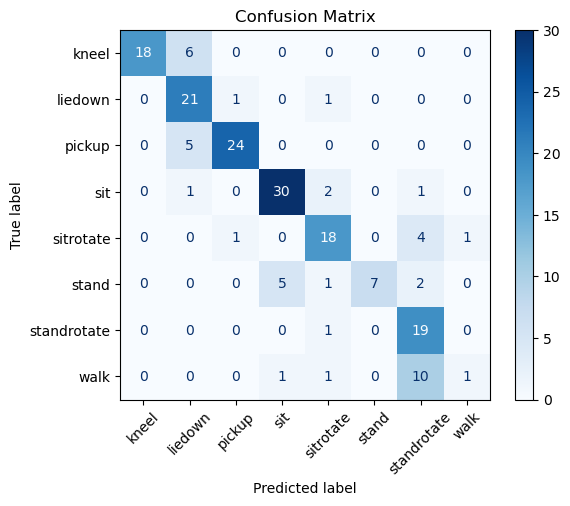

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step

=================Model outcomes from fold-5=================

Model type:  Bidirectional Long Short-Term Memory


              precision    recall  f1-score   support

       Kneel       1.00      0.96      0.98        24
    Lie Down       0.95      0.91      0.93        23
     Pick Up       0.78      1.00      0.88        29
         Sit       1.00      0.88      0.94        34
  Sit Rotate       0.89      0.71      0.79        24
       Stand       0.88      1.00      0.94        15
Stand Rotate       0.79      0.95      0.86        20
        Walk       0.80      0.62      0.70        13

    accuracy                           0.89       182
   macro avg       0.89      0.88      0.88       182
weighted avg       0.90      0.89      0.89       182



<Figure size 1200x800 with 0 Axes>

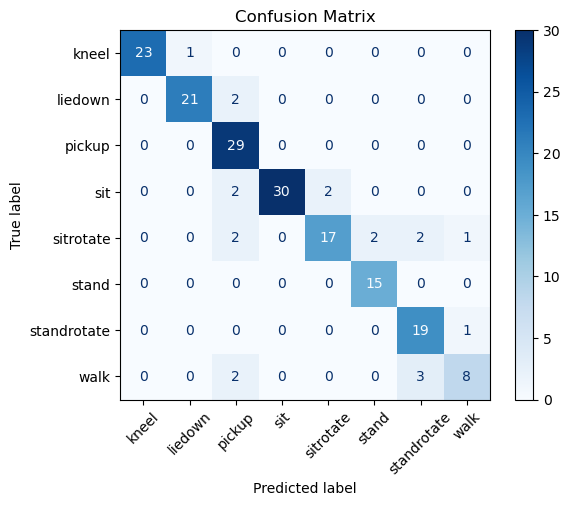

In [18]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

for i in range(1, 6):
    eva = load_model(f'bilstm_fold_{i}.keras')

    # Make predictions
    y_pred_encoded = eva.predict(x_test_holdout)
    y_pred = np.argmax(y_pred_encoded, axis=1)
    y_true = np.argmax(y_test_holdout, axis=1)
    
    # Generate confusion matrix and model outcome metrics
    cm = confusion_matrix(y_true, y_pred)
    print()
    print(f"=================Model outcomes from fold-{i}=================")
    print()
    print("Model type: ", Model_type)
    print()
    # print()
    # print("Target Length:  ", target_length)
    # print("Batch Size:     ", batchsize)
    # print("Early Stopping: ", monitor_choice)
    # print("Patience:       ", patience_number)
    # print("Dropout:        ", dropout)
    # print("Learning Rate:  ", learningrate)
    print()
    HAR_label = ['Kneel', 'Lie Down', 'Pick Up', 'Sit', 'Sit Rotate', 'Stand', 'Stand Rotate', 'Walk']
    
    # Print classification report
    print(classification_report(y_true, y_pred, zero_division=0, target_names=HAR_label))
    
    #print(confusion_matrix[0, 0])
    cmd = ConfusionMatrixDisplay(cm, display_labels=encoder.categories_[0])
    plt.figure(figsize=(12, 8))
    cmd.plot(cmap=plt.cm.Blues)
    plt.xticks(rotation=45)
    plt.title('Confusion Matrix')
    plt.show()

### Implementation of Ensemble model

In [ ]:
model_ens = []
for i in range(1, 6):
    models = load_model(f'bilstm_fold_{i}.keras')
    model_ens.append(models)

In [32]:
fold1 = load_model('bilstm_fold_1.keras')
fold2 = load_model('bilstm_fold_2.keras')
fold3 = load_model('bilstm_fold_3.keras')
fold4 = load_model('bilstm_fold_4.keras')
fold5 = load_model('bilstm_fold_5.keras')
models_voting = [fold1,fold2,fold3,fold4,fold5]

In [35]:
model_ens = []
for i in range(1, 6):
    models = load_model(f'bilstm_fold_{i}.keras')
    model_ens.append(models)

### Evaluate performance of Ensemble model using a hold-out dataset

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 372ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 333ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step

=================Models voting outcomes=================

Model type:  Bidirectional Long Short-Term Memory


              precision    recall  f1-score   support

       Kneel       1.00      1.00      1.00        24
    Lie Down       0.96      1.00      0.98        23
     Pick Up       1.00      1.00      1.00        29
         Sit       0.97      0.85      0.91        34
  Sit Rotate       0.86      1.00      0.92        24
       Stand       1.00      0.93      0.97        15
Stand Rotate       0.76      0.95      0.84        20
        Walk       0.88      0.54      0.67        13

    accuracy                           0.93       182
   macro avg       0.93      0.91      0.91       182
weighted avg       0.93      0.93      0.93       182



<Figure size 1200x800 with 0 Axes>

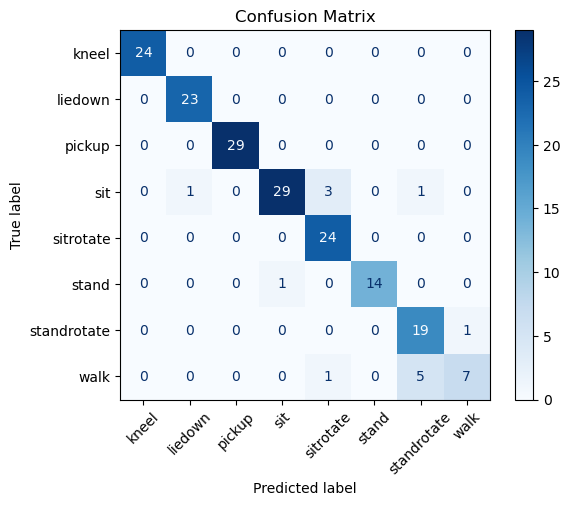

In [36]:
def ensemble_predict(models_vote, X):
    predict = [models.predict(X) for models in models_vote]
    mean = np.mean(predict, axis=0)
    return np.argmax(mean, axis=1)

y_true = np.argmax(y_test_holdout, axis=1)
y_pred = ensemble_predict(model_ens, x_test_holdout)

# Generate confusion matrix and model outcome metrics
cm = confusion_matrix(y_true, y_pred)
print()
print(f"=================Models voting outcomes=================")
print()
print("Model type: ", Model_type)
print()
# print()
# print("Target Length:  ", target_length)
# print("Batch Size:     ", batchsize)
# print("Early Stopping: ", monitor_choice)
# print("Patience:       ", patience_number)
# print("Dropout:        ", dropout)
# print("Learning Rate:  ", learningrate)
print()
HAR_label = ['Kneel', 'Lie Down', 'Pick Up', 'Sit', 'Sit Rotate', 'Stand', 'Stand Rotate', 'Walk']

# Print classification report
print(classification_report(y_true, y_pred, zero_division=0, target_names=HAR_label))

#print(confusion_matrix[0, 0])
cmd = ConfusionMatrixDisplay(cm, display_labels=encoder.categories_[0])
plt.figure(figsize=(12, 8))
cmd.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()